# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.3 Imports<a id='3.3_Imports'></a>

In [99]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from empiricaldist import Pmf
from empiricaldist import Cdf
import statsmodels.formula.api as smf

from scipy.stats import linregress

In [100]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

In [101]:
# the supplied CSV data file is the raw_data directory
covid_data1 = pd.read_csv('C:\\Users\\Admin/covid_data1_cleaned.csv')

In [102]:
covid_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21729 entries, 0 to 21728
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    21729 non-null  object 
 1   state   21729 non-null  object 
 2   fips    20923 non-null  float64
 3   cases   21729 non-null  int64  
 4   deaths  21729 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 848.9+ KB


In [103]:
covid_data1.head()

,date,state,fips,cases,deaths
0,2020-03-08,Connecticut,9001.0,1,0.0
1,2020-03-09,Connecticut,9001.0,2,0.0
2,2020-03-10,Connecticut,9001.0,2,0.0
3,2020-03-11,Connecticut,9001.0,3,0.0
4,2020-03-12,Connecticut,9001.0,5,0.0


In [104]:
covid_data1.tail()

,date,state,fips,cases,deaths
21724,2020-12-05,New York,36115.0,483,14.0
21725,2020-12-05,New York,36117.0,1347,19.0
21726,2020-12-05,New York,36119.0,53943,1527.0
21727,2020-12-05,New York,36121.0,668,9.0
21728,2020-12-05,New York,36123.0,297,7.0


Text(0.5, 1.0, 'Covid cases ')

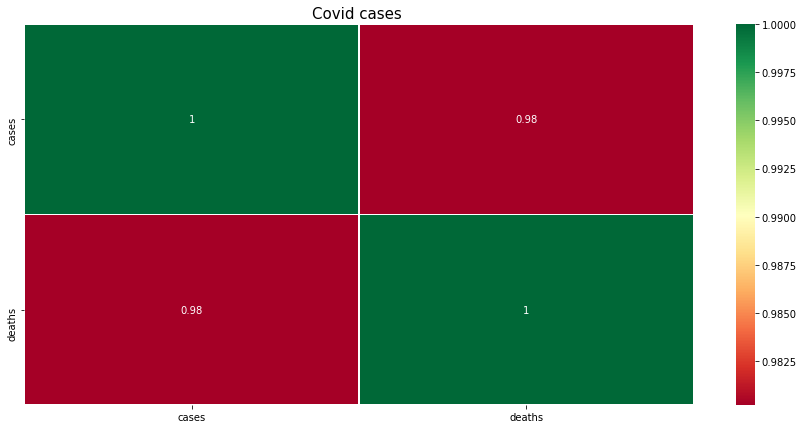

In [105]:
#Show a seaborn heatmap of correlations in covid_data1
#Hint: call pandas' `corr()` method on `covid_data1` and pass that into `sns.heatmap`
plt.subplots(figsize=(15,7))
# Using numpy ‘.tril()’ method to take the upper correlation matrix and mask attribute: to create an upper triangle matrix.
#matrix = np.tril(covid_data1.corr())
#sns.heatmap(covid_data1.corr(), linewidths=.1, annot=True, cmap='coolwarm', center=0, mask=matrix);
sns.heatmap(covid_data1[['date', 'state', 'cases', 'deaths']].corr(), linewidths=.1, annot=True, cmap='RdYlGn');
plt.title('Covid cases ', fontsize=15)

Text(0, 0.5, 'Amount of Cases in the Millions')

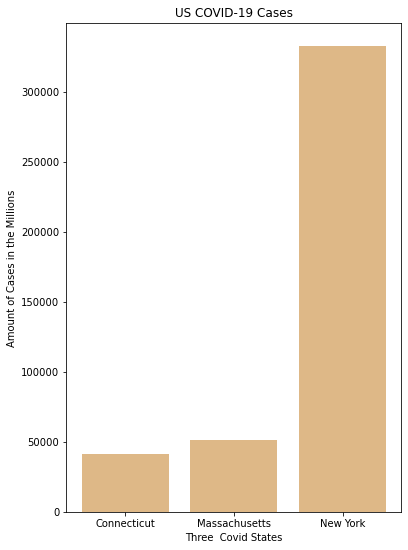

In [106]:
plt.figure(figsize=(6, 9))
plt.bar(covid_data1['state'], covid_data1['cases'], color='burlywood')
plt.title('US COVID-19 Cases')
plt.xlabel('Three  Covid States')
plt.ylabel('Amount of Cases in the Millions')

Text(0, 0.5, 'Amount of Cases in the Millions')

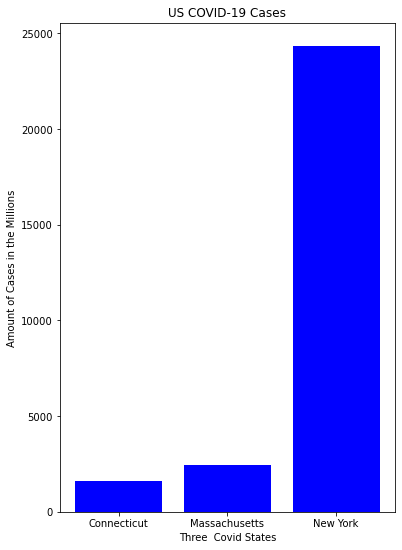

In [107]:
plt.figure(figsize=(6, 9))
plt.bar(covid_data1['state'], covid_data1['deaths'], color='blue')
plt.title('US COVID-19 Cases')
plt.xlabel('Three  Covid States')
plt.ylabel('Amount of Cases in the Millions')

In [108]:
covid_data3 = pd.read_csv('C:\\Users\\Admin/covid_data3_cleaned.csv')

In [109]:
covid_data3.head()

,date,state,totalTestResults,positive,negative,death,recovered
0,20201206,CT,3422098.0,127715.0,3294383.0,5146.0,9800.0
1,20201205,CT,3422098.0,127715.0,3294383.0,5146.0,9800.0
2,20201204,CT,3422098.0,127715.0,3294383.0,5146.0,9800.0
3,20201203,CT,3394113.0,126177.0,3267936.0,5111.0,9800.0
4,20201202,CT,3327440.0,121426.0,3206014.0,5091.0,9800.0


In [110]:
covid_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875 entries, 0 to 874
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              875 non-null    int64  
 1   state             875 non-null    object 
 2   totalTestResults  875 non-null    float64
 3   positive          825 non-null    float64
 4   negative          820 non-null    float64
 5   death             794 non-null    float64
 6   recovered         668 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 48.0+ KB


In [111]:
covid_data3.shape

(875, 7)

Text(0, 0.5, 'Amount of Cases in the Millions')

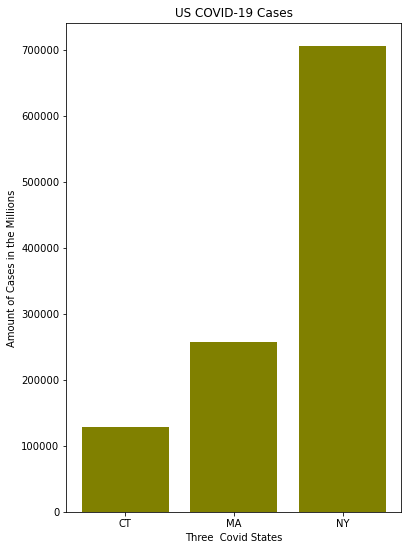

In [112]:
plt.figure(figsize=(6, 9))
plt.bar(covid_data3['state'], covid_data3['positive'], color='olive')
plt.title('US COVID-19 Cases')
plt.xlabel('Three  Covid States')
plt.ylabel('Amount of Cases in the Millions')

Text(0, 0.5, 'Amount of Cases in the Millions')

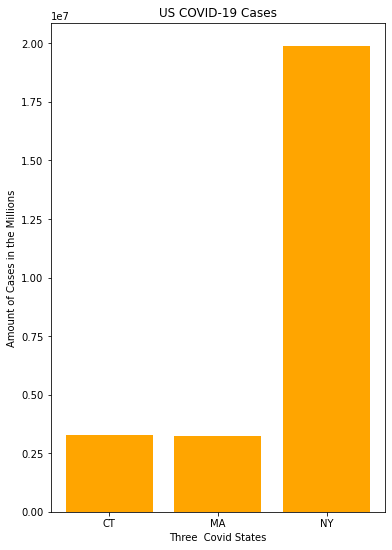

In [113]:
plt.figure(figsize=(6, 9))
plt.bar(covid_data3['state'], covid_data3['negative'], color='orange')
plt.title('US COVID-19 Cases')
plt.xlabel('Three  Covid States')
plt.ylabel('Amount of Cases in the Millions')

Text(0, 0.5, 'Amount of Cases in the Millions')

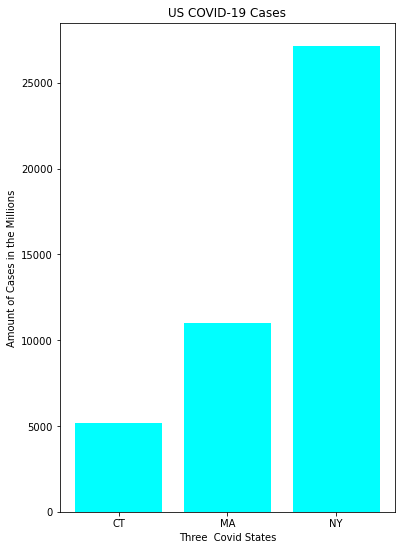

In [114]:
plt.figure(figsize=(6, 9))
plt.bar(covid_data3['state'], covid_data3['death'], color='cyan')
plt.title('US COVID-19 Cases')
plt.xlabel('Three  Covid States')
plt.ylabel('Amount of Cases in the Millions')

Text(0.5, 1.0, 'Covid cases ')

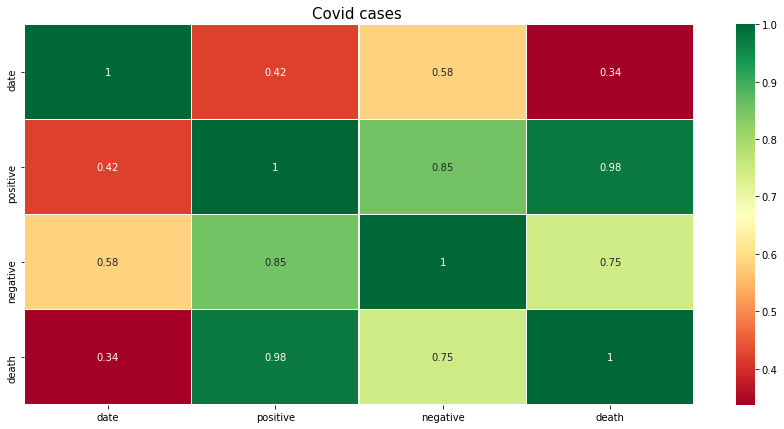

In [115]:
#Show a seaborn heatmap of correlations in covid_data3
#Hint: call pandas' `corr()` method on `covid_data3` and pass that into `sns.heatmap`
plt.subplots(figsize=(15,7))
# Using numpy ‘.tril()’ method to take the upper correlation matrix and mask attribute: to create an upper triangle matrix.
#matrix = np.tril(covid_data3.corr())
#sns.heatmap(covid_data3.corr(), linewidths=.1, annot=True, cmap='coolwarm', center=0, mask=matrix);
sns.heatmap(covid_data3[['date', 'state', 'positive', 'negative', 'death']].corr(), linewidths=.1, annot=True, cmap='RdYlGn');
plt.title('Covid cases ', fontsize=15)

In [116]:
vac_data = pd.read_csv('C:\\Users\\Admin/vac_data_cleaned.csv')

In [117]:
vac_data.head()

,date,location,people_vaccinated,people_fully_vaccinated_per_hundred,people_fully_vaccinated,daily_vaccinations
0,2021-01-12,Connecticut,56350.0,0.12,4174.0,NaN
1,2021-01-13,Connecticut,58920.0,0.15,5268.0,10480.0
2,2021-01-14,Connecticut,156366.0,NaN,NaN,10251.0
3,2021-01-15,Connecticut,166722.0,0.48,17162.0,11490.0
4,2021-01-16,Connecticut,NaN,NaN,NaN,11346.0


In [118]:
vac_data.shape

(402, 6)

In [119]:
vac_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 402 non-null    object 
 1   location                             402 non-null    object 
 2   people_vaccinated                    390 non-null    float64
 3   people_fully_vaccinated_per_hundred  387 non-null    float64
 4   people_fully_vaccinated              387 non-null    float64
 5   daily_vaccinations                   399 non-null    float64
dtypes: float64(4), object(2)
memory usage: 19.0+ KB


In [120]:
vac_data.location.unique()

array(['Connecticut', 'Massachusetts', 'New York State'], dtype=object)

Text(0, 0.5, 'people_vaccinated')

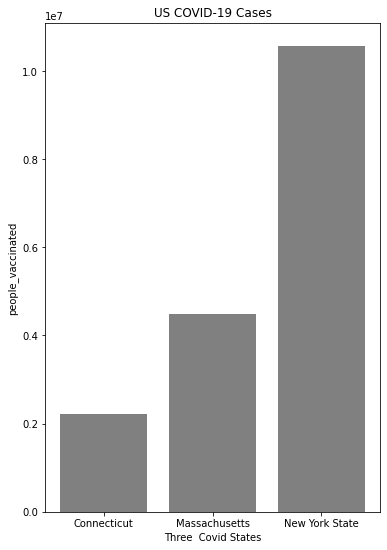

In [121]:
plt.figure(figsize=(6, 9))
plt.bar(vac_data['location'], vac_data['people_vaccinated'], color='grey')
plt.title('US COVID-19 Cases')
plt.xlabel('Three  Covid States')
plt.ylabel('people_vaccinated')

Text(0, 0.5, 'people_vaccinated')

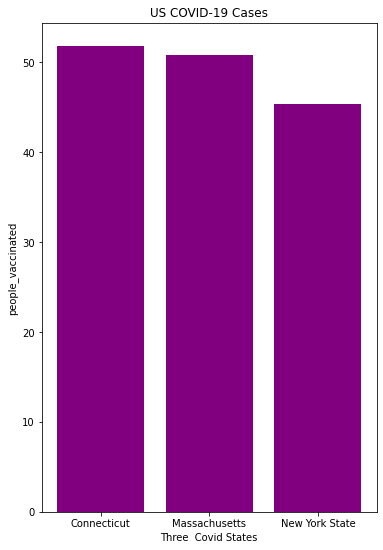

In [122]:
plt.figure(figsize=(6, 9))
plt.bar(vac_data['location'], vac_data['people_fully_vaccinated_per_hundred'], color='purple')
plt.title('US COVID-19 Cases')
plt.xlabel('Three  Covid States')
plt.ylabel('people_vaccinated')

Text(0, 0.5, 'people_vaccinated')

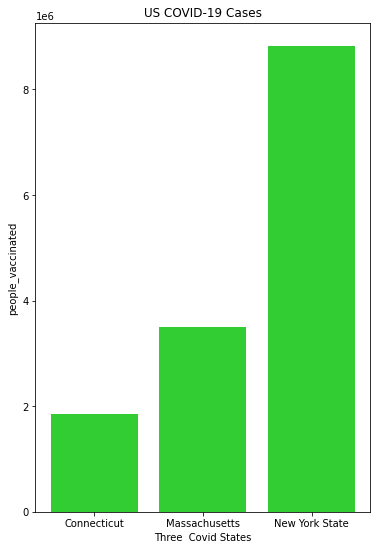

In [123]:
plt.figure(figsize=(6, 9))
plt.bar(vac_data['location'], vac_data['people_fully_vaccinated'], color='limegreen')
plt.title('US COVID-19 Cases')
plt.xlabel('Three  Covid States')
plt.ylabel('people_vaccinated')

Text(0, 0.5, 'people_vaccinated')

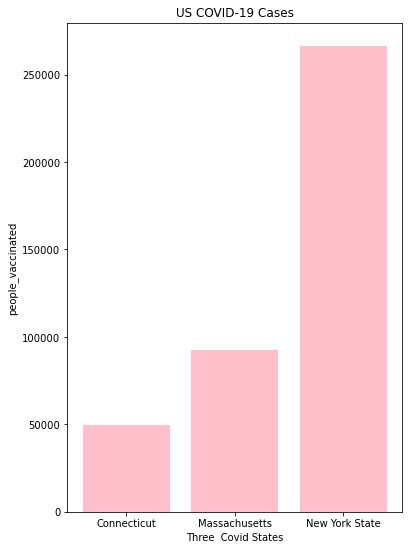

In [124]:
plt.figure(figsize=(6, 9))
plt.bar(vac_data['location'], vac_data['daily_vaccinations'], color='pink')
plt.title('US COVID-19 Cases')
plt.xlabel('Three  Covid States')
plt.ylabel('people_vaccinated')

Text(0.5, 1.0, 'Vaccination ')

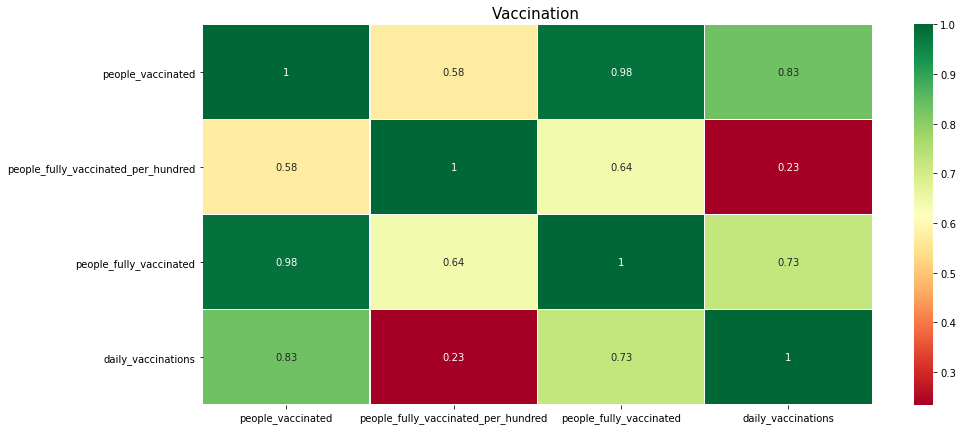

In [125]:
#Show a seaborn heatmap of correlations in vac_data
#Hint: call pandas' `corr()` method on `vac_data` and pass that into `sns.heatmap`
plt.subplots(figsize=(15,7))
# Using numpy ‘.tril()’ method to take the upper correlation matrix and mask attribute: to create an upper triangle matrix.
#matrix = np.tril(vac_data.corr())
#sns.heatmap(vac_data.corr(), linewidths=.1, annot=True, cmap='coolwarm', center=0, mask=matrix);
sns.heatmap(vac_data[['date', 'location', 'people_vaccinated', 'people_fully_vaccinated_per_hundred','people_fully_vaccinated', 'daily_vaccinations']].corr(), linewidths=.1, annot=True, cmap='RdYlGn');
plt.title('Vaccination ', fontsize=15)